# Cinema Analytics and Prediction System - EDA

## 1. Merge movies and credits datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from collections import Counter

In [2]:
# Load CSV files
movies = pd.read_csv('../data/movies.csv')
credits = pd.read_csv('../data/credits.csv')

In [3]:
print(movies.columns)
print(movies.shape)

print(credits.columns)
print(credits.shape)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
(4803, 20)
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
(4803, 4)


In [4]:
movies.iloc[1]

budget                                                          300000000
genres                  [{"id": 12, "name": "Adventure"}, {"id": 14, "...
homepage                     http://disney.go.com/disneypictures/pirates/
id                                                                    285
keywords                [{"id": 270, "name": "ocean"}, {"id": 726, "na...
original_language                                                      en
original_title                   Pirates of the Caribbean: At World's End
overview                Captain Barbossa, long believed to be dead, ha...
popularity                                                     139.082615
production_companies    [{"name": "Walt Disney Pictures", "id": 2}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2007-05-19
revenue                                                         961000000
runtime                               

In [5]:
# Rename column name
movies.rename(columns={
    'id': 'movie_id',
    'title': 'movie_title',
}, inplace=True)

In [6]:
# Merge two datasets
combined_df = movies.merge(credits, on='movie_id', how='left')

In [7]:
combined_df['movie_id'].unique().shape

(4803,)

In [8]:
print(combined_df.shape)
print(combined_df.columns)
print(combined_df[['title', 'budget', 'revenue', 'vote_average','vote_count']].head())

(4803, 23)
Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'movie_title', 'vote_average', 'vote_count', 'title', 'cast', 'crew'],
      dtype='object')
                                      title     budget     revenue  \
0                                    Avatar  237000000  2787965087   
1  Pirates of the Caribbean: At World's End  300000000   961000000   
2                                   Spectre  245000000   880674609   
3                     The Dark Knight Rises  250000000  1084939099   
4                               John Carter  260000000   284139100   

   vote_average  vote_count  
0           7.2       11800  
1           6.9        4500  
2           6.3        4466  
3           7.6        9106  
4           6.1        2124  


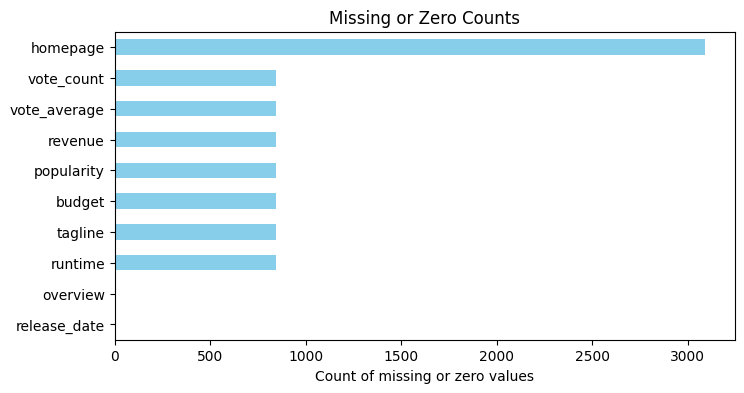

In [9]:
# Plot missing or zero count features

missing_zero_counts = {}
nan_values = combined_df.isnull().sum()
nan_features =  nan_values[nan_values > 0]

for col, null_count in nan_features.items():      
    missing_zero_counts[col] = null_count

for col in combined_df.columns:
    zero_count = (combined_df[col] == 0).sum()  
    if zero_count > 0:
         missing_zero_counts[col] = null_count
        
# Convert to Series
missing_series = pd.Series(missing_zero_counts)

# Sort for prettier plot
missing_series = missing_series.sort_values()

# Plot horizontal bar chart
missing_series.plot.barh(color='skyblue', figsize=(8, 4))
plt.xlabel('Count of missing or zero values')
plt.title('Missing or Zero Counts')
plt.show()


In [10]:
combined_df["release_date"] = pd.to_datetime(combined_df["release_date"], errors='coerce')
combined_df["release_year"] = combined_df["release_date"].dt.year.astype('Int64')
combined_df["release_month"] = combined_df["release_date"].dt.month.astype('Int64')

In [11]:
def get_genre_labels(genre):
    try:
        list = json.loads(genre)
        return [g["name"] for g in list]
    except:
        return []

combined_df["genre_labels"] = combined_df["genres"].apply(get_genre_labels)

In [12]:
filtered = combined_df[combined_df['revenue'] < 10]
print(len(filtered))

1430


In [13]:
def get_cast_names(cast):
    try:
        cast_list = json.loads(cast)
        return [c["name"] for c in cast_list[:5]]  # top 5 actors
    except:
        return []

combined_df["top_cast"] = combined_df["cast"].apply(get_cast_names)

In [14]:
def get_production_companies(companies):
    try:
        companies_list = json.loads(companies)
        return [c["name"] for c in companies_list]
    except:
        return []

combined_df["production_companies_list"] = combined_df["production_companies"].apply(get_production_companies)


In [15]:
combined_df.iloc[0]

budget                                                               237000000
genres                       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                           http://www.avatarmovie.com/
movie_id                                                                 19995
keywords                     [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                           en
original_title                                                          Avatar
overview                     In the 22nd century, a paraplegic Marine is di...
popularity                                                          150.437577
production_companies         [{"name": "Ingenious Film Partners", "id": 289...
production_countries         [{"iso_3166_1": "US", "name": "United States o...
release_date                                               2009-12-10 00:00:00
revenue                                             

## 2. EDA

In [16]:
### Missing Values
nan_values = combined_df.isnull().sum()
print(nan_values[nan_values > 0])

homepage         3091
overview            3
release_date        1
runtime             2
tagline           844
release_year        1
release_month       1
dtype: int64


In [17]:
# Returns True for duplicated titles
duplicates_mask = combined_df['movie_title'].duplicated()

print(len(combined_df[duplicates_mask]))

3


In [18]:
len(combined_df[combined_df['budget'] <=0])

1037

In [19]:
summary = combined_df[['budget', 'revenue','popularity','runtime', 'vote_average', 'vote_count', 'release_year' ]].describe()

print(summary)

             budget       revenue   popularity      runtime  vote_average  \
count  4.803000e+03  4.803000e+03  4803.000000  4801.000000   4803.000000   
mean   2.904504e+07  8.226064e+07    21.492301   106.875859      6.092172   
std    4.072239e+07  1.628571e+08    31.816650    22.611935      1.194612   
min    0.000000e+00  0.000000e+00     0.000000     0.000000      0.000000   
25%    7.900000e+05  0.000000e+00     4.668070    94.000000      5.600000   
50%    1.500000e+07  1.917000e+07    12.921594   103.000000      6.200000   
75%    4.000000e+07  9.291719e+07    28.313505   118.000000      6.800000   
max    3.800000e+08  2.787965e+09   875.581305   338.000000     10.000000   

         vote_count  release_year  
count   4803.000000        4802.0  
mean     690.217989   2002.468763  
std     1234.585891     12.414354  
min        0.000000        1916.0  
25%       54.000000        1999.0  
50%      235.000000        2005.0  
75%      737.000000        2011.0  
max    13752.00000

In [20]:
combined_df['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

### Revenue

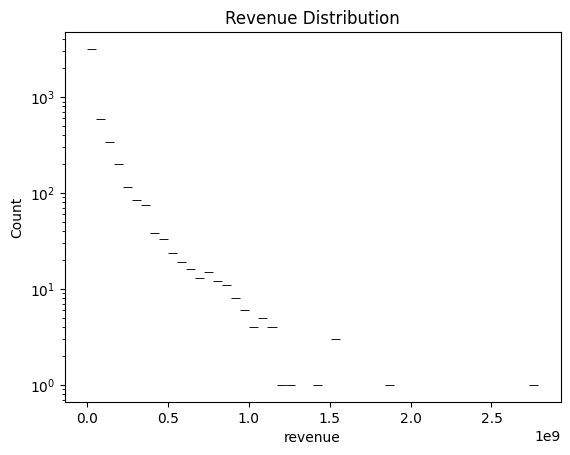

In [21]:
sns.histplot(movies["revenue"], bins=50, log_scale=(False, True))
plt.title("Revenue Distribution")
plt.show()

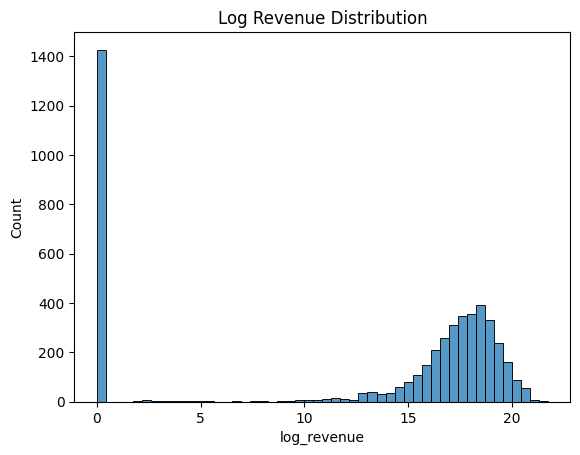

In [22]:
movies["log_revenue"] = np.log1p(movies["revenue"])
sns.histplot(movies["log_revenue"], bins=50)
plt.title("Log Revenue Distribution")
plt.show()

### Budget vs Revenue

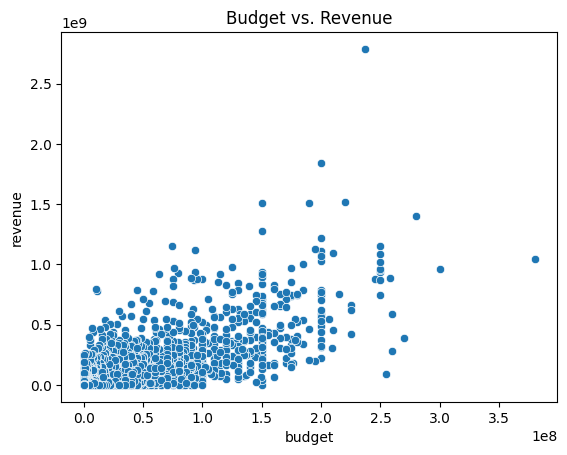

In [23]:
sns.scatterplot(
    x=movies["budget"],
    y=movies["revenue"]
)
plt.title("Budget vs. Revenue")
plt.show()


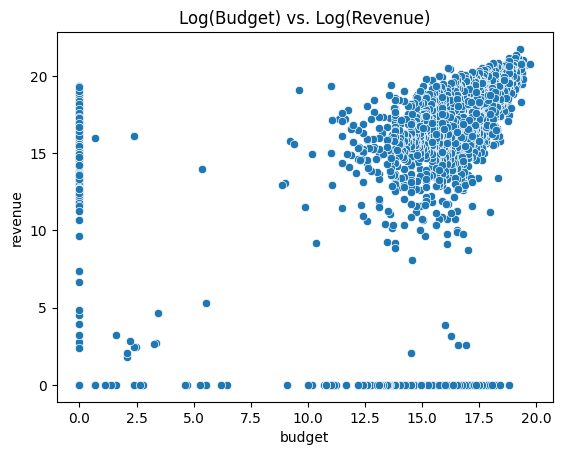

In [24]:
sns.scatterplot(
    x=np.log1p(movies["budget"]),
    y=np.log1p(movies["revenue"])
)
plt.title("Log(Budget) vs. Log(Revenue)")
plt.show()


In [25]:
# correclation
print(movies[["budget", "revenue"]].corr())

           budget   revenue
budget   1.000000  0.730823
revenue  0.730823  1.000000


### Runtime vs. Revenue

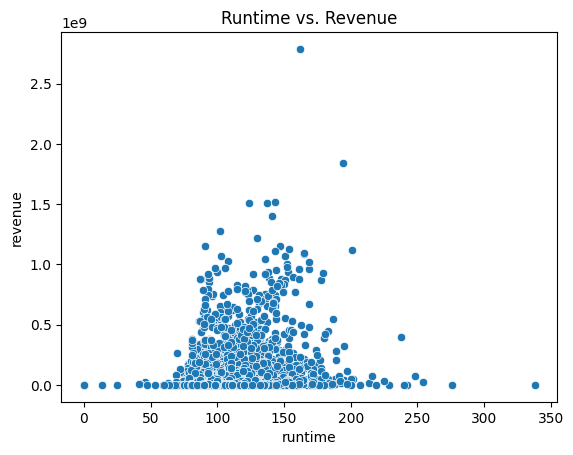

In [26]:
sns.scatterplot(x="runtime", y="revenue", data=movies)
plt.title("Runtime vs. Revenue")
plt.show()

### Revenue Trend

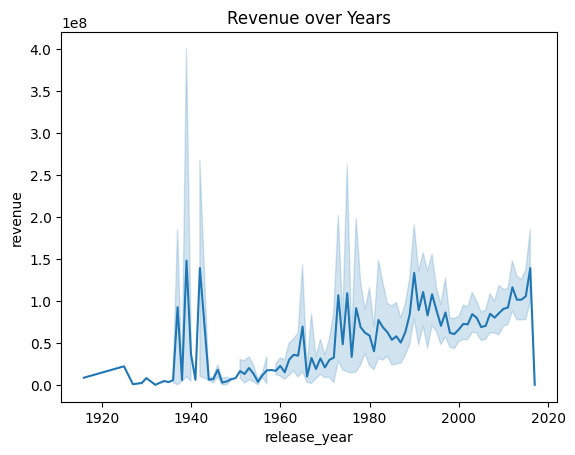

In [27]:
sns.lineplot(x="release_year", y="revenue", data=combined_df)
plt.title("Revenue over Years")
plt.show()

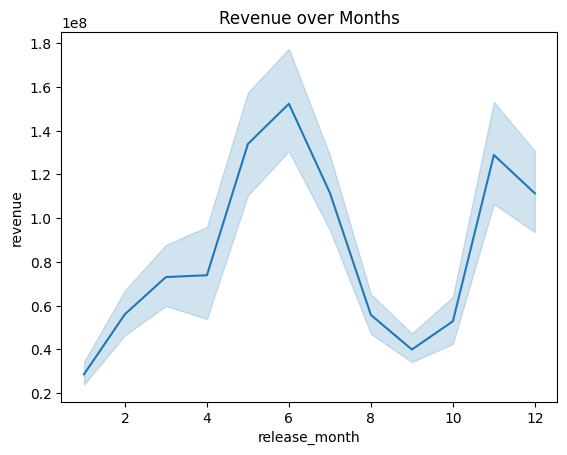

In [28]:
sns.lineplot(x="release_month", y="revenue", data=combined_df)
plt.title("Revenue over Months")
plt.show()

### Genre

In [29]:
combined_df.iloc[0]

budget                                                               237000000
genres                       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                           http://www.avatarmovie.com/
movie_id                                                                 19995
keywords                     [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                           en
original_title                                                          Avatar
overview                     In the 22nd century, a paraplegic Marine is di...
popularity                                                          150.437577
production_companies         [{"name": "Ingenious Film Partners", "id": 289...
production_countries         [{"iso_3166_1": "US", "name": "United States o...
release_date                                               2009-12-10 00:00:00
revenue                                             

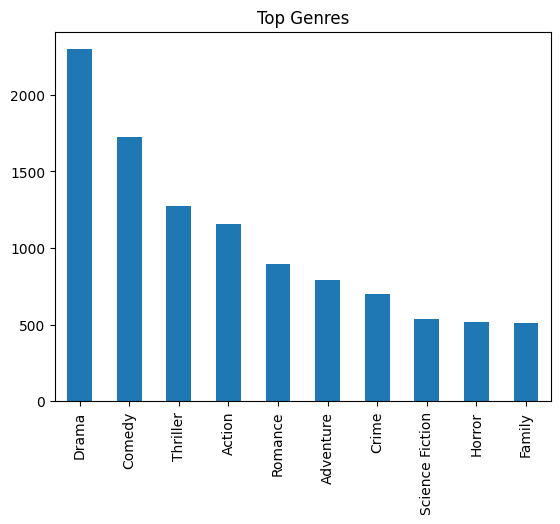

In [30]:
all_genres = [g for glist in combined_df["genre_labels"] for g in glist]
genre_counts = Counter(all_genres)

# Top 10 genres

pd.Series(genre_counts).sort_values(ascending=False).head(10).plot.bar()
plt.title("Top Genres")
plt.show()


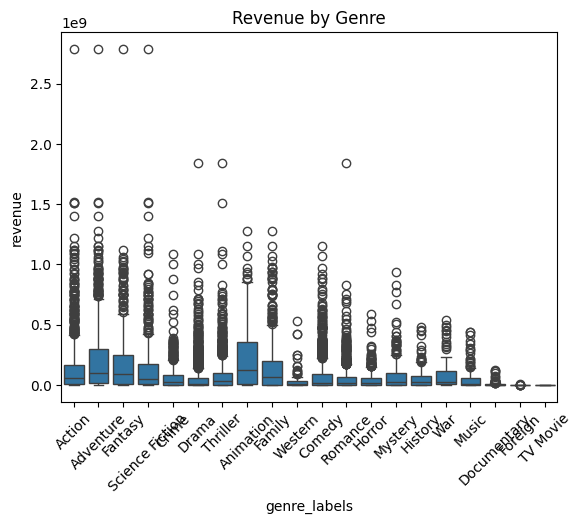

In [31]:
# Explode list into rows
genres_exploded = combined_df.explode("genre_labels")

# Reset index to remove duplicates
genres_exploded = genres_exploded.reset_index(drop=True)


# Plot
sns.boxplot(x="genre_labels", y="revenue", data=genres_exploded)
plt.xticks(rotation=45)
plt.title("Revenue by Genre")
plt.show()


### Language

In [32]:
u = combined_df["original_language"].value_counts()
print( u)

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64


In [33]:
lang_revenue = combined_df.groupby("original_language")["revenue"].median().sort_values(ascending=False)
print(lang_revenue.head(10))
print(len(lang_revenue))

original_language
te    100000000.0
xx     55260558.0
en     22034832.0
ja     13231147.0
cn     12326197.0
ko     11301649.0
pl     10700000.0
af      9879971.0
th      8936663.0
nb      4159678.0
Name: revenue, dtype: float64
37


In [34]:
import pycountry

lang_revenue.index = lang_revenue.index.map(
    lambda x: (
        pycountry.languages.get(alpha_2=x).name
             if pycountry.languages.get(alpha_2=x)
             else 'Unknown'
    )
)

print(lang_revenue)


original_language
Telugu                  100000000.0
Unknown                  55260558.0
English                  22034832.0
Japanese                 13231147.0
Unknown                  12326197.0
Korean                   11301649.0
Polish                   10700000.0
Afrikaans                 9879971.0
Thai                      8936663.0
Norwegian Bokmål          4159678.0
Russian                   4037782.0
Indonesian                2274881.0
Norwegian                 1984662.0
Spanish                   1297059.0
Danish                     674918.0
Vietnamese                 639000.0
Romanian                   592891.5
Dutch                      265024.0
Modern Greek (1453-)       110197.0
Chinese                    108348.0
Icelandic                      11.0
Slovenian                       0.0
Czech                           0.0
Turkish                         0.0
French                          0.0
Tamil                           0.0
Swedish                         0.0
Hungarian 

### Cast and Crew

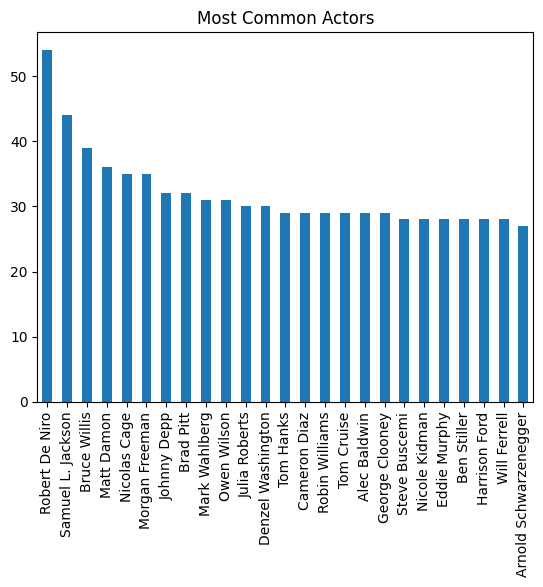

In [35]:
all_actors = [c for clist in combined_df["top_cast"] for c in clist]
actor_counts = Counter(all_actors)
pd.Series(actor_counts).sort_values(ascending=False).head(25).plot.bar()
plt.title("Most Common Actors")
plt.show()


In [36]:
combined_df[combined_df["budget"] > 300000000]  # >$300M budget


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,title,cast,crew,release_year,release_month,genre_labels,top_cast,production_companies_list
17,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,6.4,4948,Pirates of the Caribbean: On Stranger Tides,"[{""cast_id"": 15, ""character"": ""Captain Jack Sp...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",2011,5,"[Adventure, Action, Fantasy]","[Johnny Depp, Penélope Cruz, Ian McShane, Kevi...","[Walt Disney Pictures, Jerry Bruckheimer Films..."


### Rating

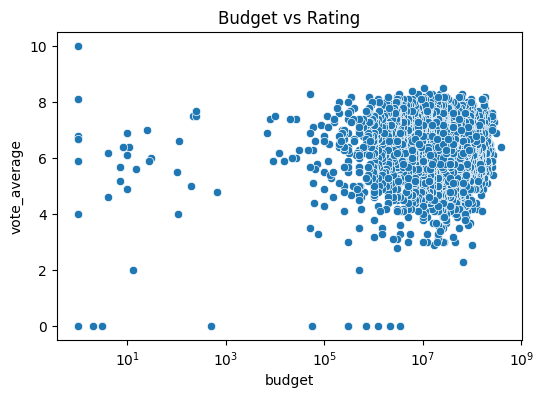

In [37]:
# Budget vs vote_average
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_df, x='budget', y='vote_average')
plt.title('Budget vs Rating')
plt.xscale('log')
plt.show()


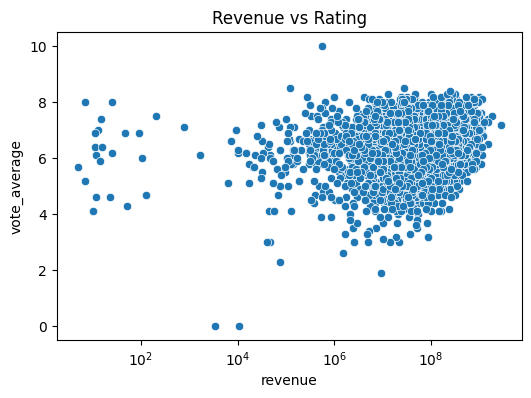

In [38]:
# Revenue vs Rating scatter
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_df, x='revenue', y='vote_average')
plt.title('Revenue vs Rating')
plt.xscale('log')
plt.show()


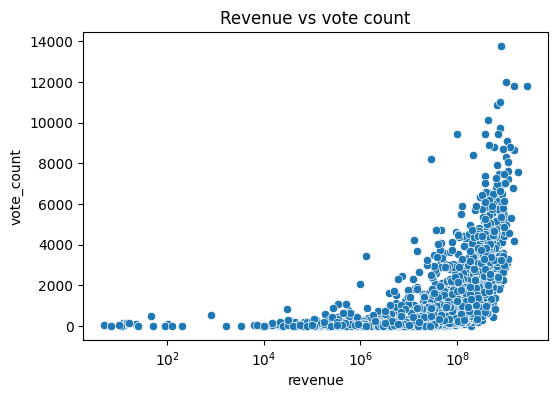

In [39]:
# Revenue vs vote count
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_df, x='revenue', y='vote_count')
plt.title('Revenue vs vote count')
plt.xscale('log')
plt.show()

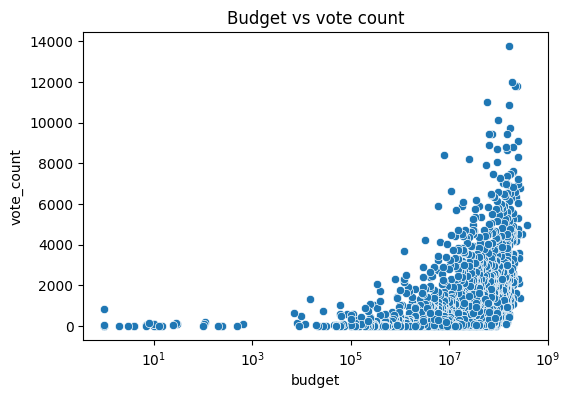

In [40]:
# budget vs vote count
plt.figure(figsize=(6, 4))
sns.scatterplot(data=combined_df, x='budget', y='vote_count')
plt.title('Budget vs vote count')
plt.xscale('log')
plt.show()

### Correlation

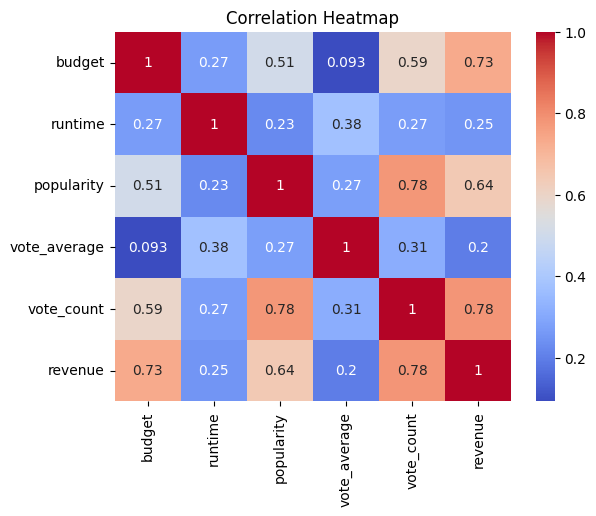

In [41]:
numeric_cols = ["budget", "runtime", "popularity", "vote_average", "vote_count", "revenue"]
sns.heatmap(movies[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Save merged dataset

In [42]:
combined_df.to_csv("../data/merged_data.csv", index=False)